# Data Exploration and Visualization

---

## Purpose

This notebook examines our dataset to understand which factors are associated with higher income levels.

- Check data quality (missing values, zeros, negatives)
- Analyze categorical variables (education, occupation, etc.) by income level
- Compare continuous variables (age, hours worked, etc.) across income groups
- Identify which variables might be useful predictors

---

In [1]:
!pip install -r ../requirements.txt -q

In [2]:
# import packages
import csv
import numpy as np
import pandas as pd
import warnings
import os

# visualization tools
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# ignore warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_parquet("../data/processed_data.parquet")
df = df.reset_index(drop=True)

In [4]:
target = "label"
weight_col = "weight"

## Visualization


Total variables: 45
Variables with missing values: 16
Variables without missing values: 29


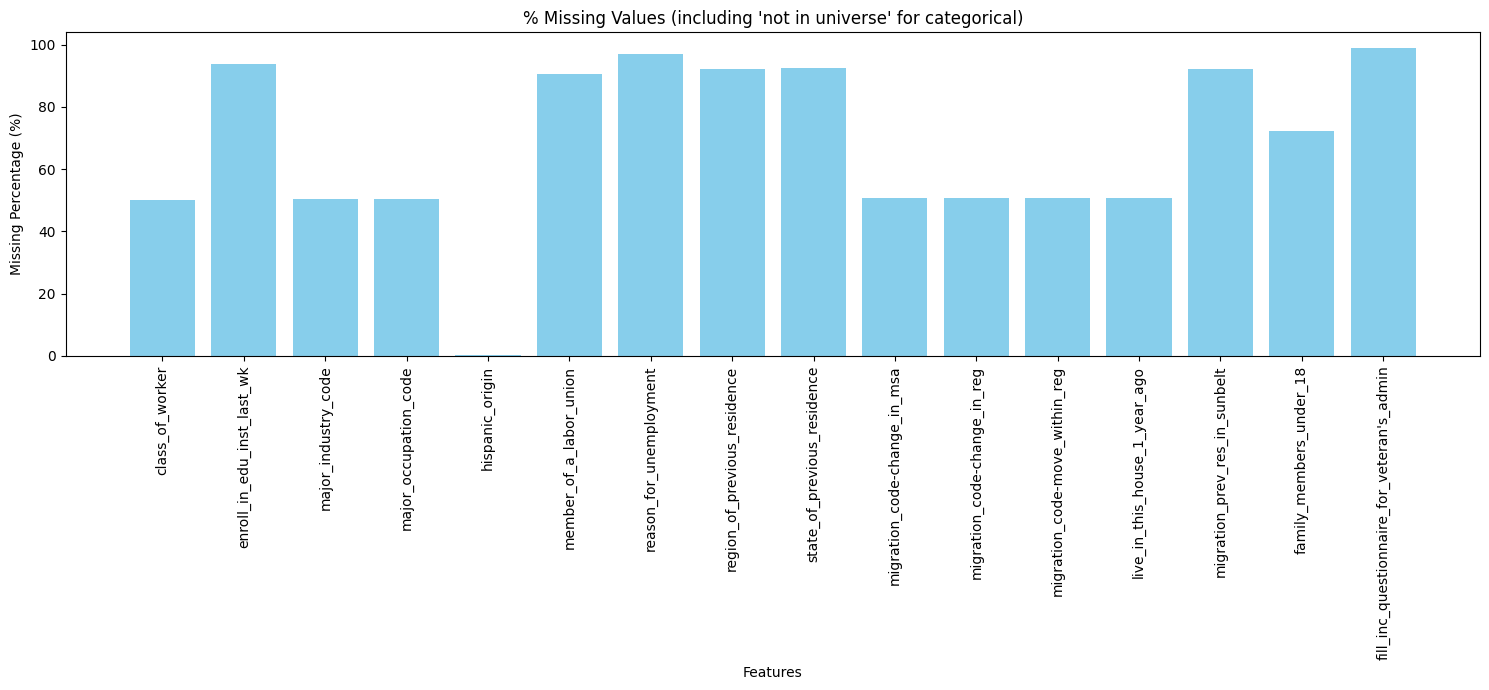


Total continuous variables: 22
Variables with zero values: 19
Variables without zero values: 3


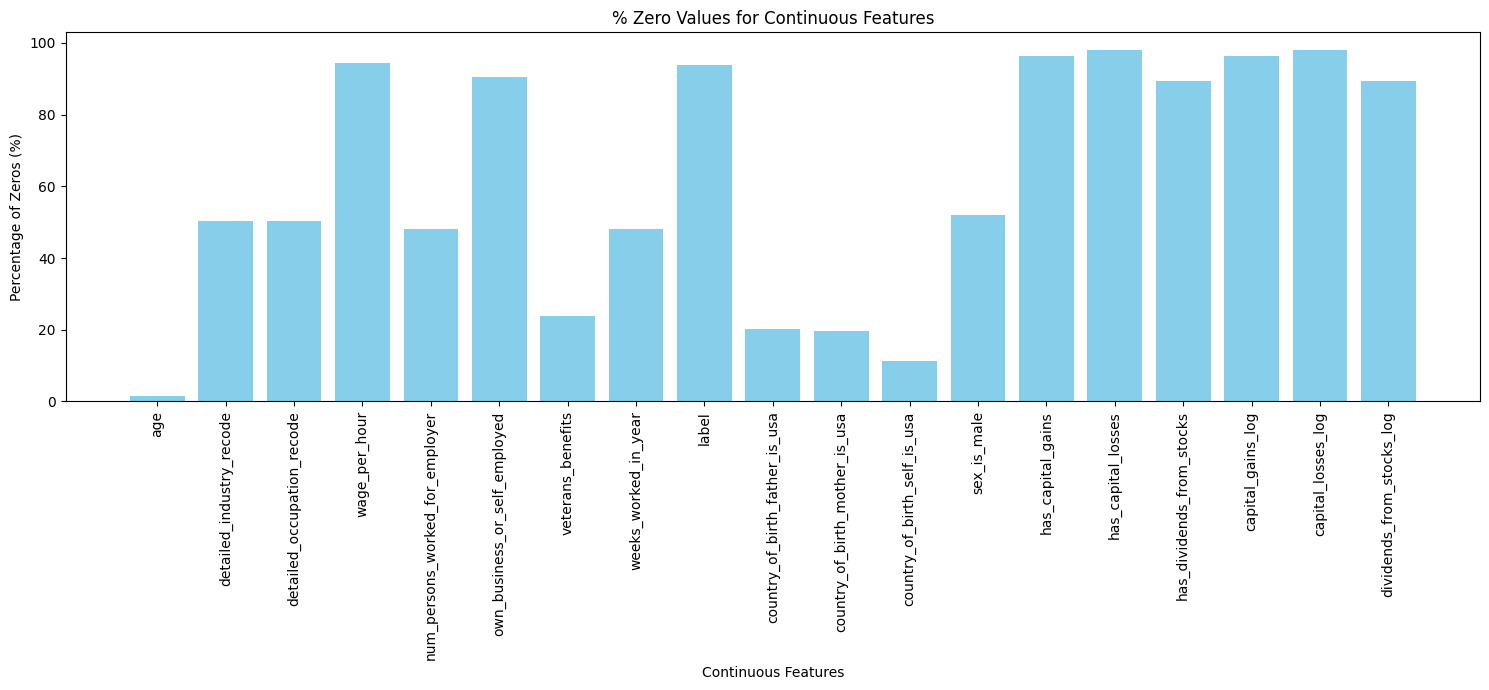


Total continuous variables: 22
Variables with negative values: 0
Variables without negative values: 22


In [5]:
artifact_dir = "../artifacts/data_quality/"
os.makedirs(artifact_dir, exist_ok=True)

missing_col_names = []
missing_cnt_percentage = []
vars_with_missing = 0

for column in df.columns:
    missing_count = df[column].isnull().sum()
    if df[column].dtype == "object" or df[column].dtype.name == "category":
        missing_count += (
            df[column].fillna("").str.lower().str.contains("not in universe").sum()
        )

    missing_pct = (missing_count * 100) / df.shape[0]

    if missing_pct > 0:
        missing_col_names.append(column)
        missing_cnt_percentage.append(missing_pct)
        vars_with_missing += 1


print(f"\nTotal variables: {len(df.columns)}")
print(f"Variables with missing values: {vars_with_missing}")
print(f"Variables without missing values: {len(df.columns) - vars_with_missing}")

if len(missing_col_names) > 0:
    plt.figure(figsize=(15, 7))
    plt.bar(missing_col_names, missing_cnt_percentage, color="skyblue")
    plt.title("% Missing Values (including 'not in universe' for categorical)")
    plt.xlabel("Features")
    plt.xticks(rotation=90)
    plt.ylabel("Missing Percentage (%)")
    plt.tight_layout()
    plt.savefig(os.path.join(artifact_dir, "missing_percentage_plot.png"), dpi=300)
    plt.show()
    plt.close()

cont_columns_zero = []
per_zero = []
cont_columns_neg = []
per_neg = []
vars_with_zeros = 0
vars_with_negatives = 0

for column in df.columns:
    if df[column].dtype in ["float64", "int64"]:
        data = df[column].dropna()
        total_count = data.shape[0]

        if total_count > 0:
            zero_count = (data == 0).sum()
            zero_pct = (zero_count * 100) / total_count
            if zero_pct > 0:
                cont_columns_zero.append(column)
                per_zero.append(zero_pct)
                vars_with_zeros += 1

            neg_count = (data < 0).sum()
            neg_pct = (neg_count * 100) / total_count
            if neg_pct > 0:
                cont_columns_neg.append(column)
                per_neg.append(neg_pct)
                vars_with_negatives += 1

total_cont_vars = df.select_dtypes(include=["float64", "int64"]).shape[1]

print(f"\nTotal continuous variables: {total_cont_vars}")
print(f"Variables with zero values: {vars_with_zeros}")
print(f"Variables without zero values: {total_cont_vars - vars_with_zeros}")

if len(cont_columns_zero) > 0:
    plt.figure(figsize=(15, 7))
    plt.bar(cont_columns_zero, per_zero, color="skyblue")
    plt.title("% Zero Values for Continuous Features")
    plt.xlabel("Continuous Features")
    plt.xticks(rotation=90)
    plt.ylabel("Percentage of Zeros (%)")
    plt.tight_layout()
    plt.savefig(os.path.join(artifact_dir, "percentage_of_zeros_plot.png"), dpi=300)
    plt.show()
    plt.close()

print(f"\nTotal continuous variables: {total_cont_vars}")
print(f"Variables with negative values: {vars_with_negatives}")
print(f"Variables without negative values: {total_cont_vars - vars_with_negatives}")

if len(cont_columns_neg) > 0:
    plt.figure(figsize=(15, 7))
    plt.bar(cont_columns_neg, per_neg, color="skyblue")
    plt.title("% Negative Values for Continuous Features")
    plt.xlabel("Continuous Features")
    plt.xticks(rotation=90)
    plt.ylabel("Percentage of Negative Values (%)")
    plt.tight_layout()
    plt.savefig(os.path.join(artifact_dir, "percentage_of_negatives_plot.png"), dpi=300)
    plt.show()
    plt.close()

In [6]:
categorical = []
continuous = []

cat_cols = [
    "country_of_birth_father_is_usa",
    "country_of_birth_mother_is_usa",
    "country_of_birth_self_is_usa",
    "sex_is_male",
    "has_capital_gains",
    "has_capital_losses",
    "has_dividends_from_stocks",
]

for column in df.columns:
    if df[column].dtype == "int64" or df[column].dtype == "float64":
        if column not in [
            "label",
            "weight",
            "detailed industry recode",
            "detailed occupation recode",
            "year",
        ]:
            continuous.append(column)

    elif df[column].dtype == "object":
        if df[column].nunique() < 6:
            categorical.append(column)

for col in cat_cols:
    if col in continuous:
        continuous.remove(col)

for col in cat_cols:
    if col not in categorical:
        categorical.append(col)

print("\nContinuous Columns:", continuous)
print("\nCategorical Columns (Less than 6 categories):", categorical)


Continuous Columns: ['age', 'detailed_industry_recode', 'detailed_occupation_recode', 'wage_per_hour', 'num_persons_worked_for_employer', 'own_business_or_self_employed', 'veterans_benefits', 'weeks_worked_in_year', 'education_numeric', 'capital_gains_log', 'capital_losses_log', 'dividends_from_stocks_log']

Categorical Columns (Less than 6 categories): ['enroll_in_edu_inst_last_wk', 'race', 'member_of_a_labor_union', 'state_of_previous_residence', 'live_in_this_house_1_year_ago', 'migration_prev_res_in_sunbelt', 'family_members_under_18', 'citizenship', "fill_inc_questionnaire_for_veteran's_admin", 'country_of_birth_father_is_usa', 'country_of_birth_mother_is_usa', 'country_of_birth_self_is_usa', 'sex_is_male', 'has_capital_gains', 'has_capital_losses', 'has_dividends_from_stocks']


## Categorical Features

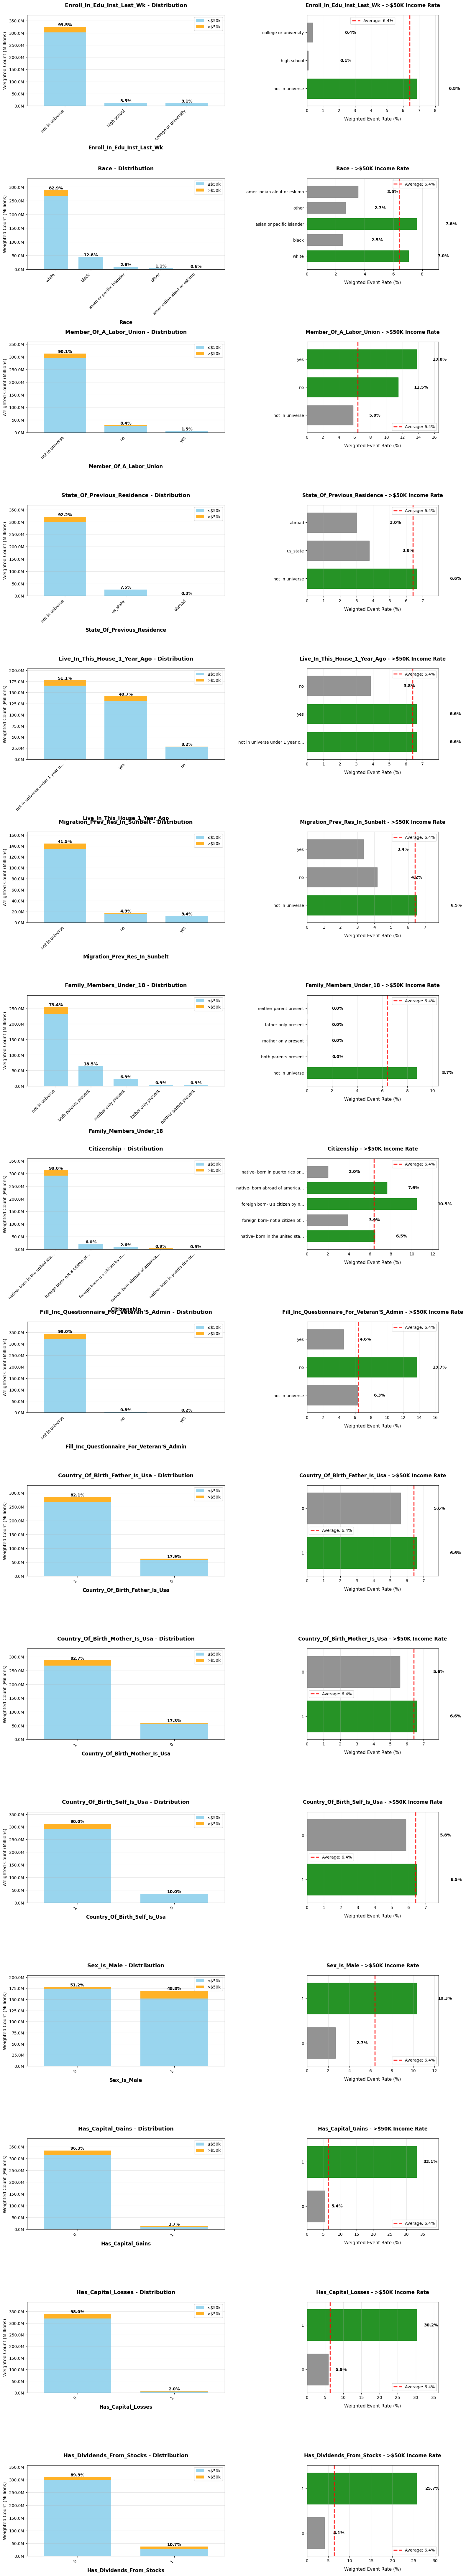

In [7]:
num_cats = len(categorical)

if num_cats > 0:
    fig = plt.figure(figsize=(18, 7 * num_cats))
    gs = GridSpec(num_cats, 2, figure=fig, width_ratios=[3, 2], hspace=0.8, wspace=0.5)

    for i, col in enumerate(categorical):
        display_name = col.title()
        grp = df.groupby(col)
        summary = grp.agg({target: "sum", weight_col: "sum"}).reset_index()

        summary["low_income"] = grp.apply(
            lambda x: ((1 - x[target]) * x[weight_col]).sum(), include_groups=False
        ).values
        summary["high_income"] = grp.apply(
            lambda x: (x[target] * x[weight_col]).sum(), include_groups=False
        ).values
        summary["event_rate"] = summary["high_income"] / summary[weight_col] * 100
        summary["population_pct"] = summary[weight_col] / df[weight_col].sum() * 100
        summary = summary.sort_values("population_pct", ascending=False)
        summary[col] = (
            summary[col]
            .astype(str)
            .apply(lambda x: x[:30] + "..." if len(x) > 30 else x)
        )

        ax1 = fig.add_subplot(gs[i, 0])
        positions = np.arange(len(summary))

        ax1.bar(
            positions,
            summary["low_income"],
            0.7,
            label="≤$50k",
            color="skyblue",
            alpha=0.85,
        )
        ax1.bar(
            positions,
            summary["high_income"],
            0.7,
            bottom=summary["low_income"],
            label=">$50k",
            color="orange",
            alpha=0.85,
        )

        ax1.set_xlabel(display_name, fontsize=12, fontweight="bold", labelpad=10)
        ax1.set_ylabel("Weighted Count", fontsize=11)
        ax1.set_title(
            f"{display_name} - Distribution", fontsize=13, fontweight="bold", pad=20
        )
        ax1.set_xticks(positions)
        ax1.set_xticklabels(summary[col], rotation=45, ha="right", fontsize=10)
        ax1.legend(loc="upper right", fontsize=10)
        ax1.grid(axis="y", alpha=0.3)

        max_val = summary[weight_col].max()
        if max_val >= 1e9:
            ax1.yaxis.set_major_formatter(
                plt.FuncFormatter(lambda x, p: f"{x / 1e9:.1f}B")
            )
            ax1.set_ylabel("Weighted Count (Billions)", fontsize=11)
        elif max_val >= 1e6:
            ax1.yaxis.set_major_formatter(
                plt.FuncFormatter(lambda x, p: f"{x / 1e6:.1f}M")
            )
            ax1.set_ylabel("Weighted Count (Millions)", fontsize=11)
        else:
            ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x:,.0f}"))

        for j, pct in enumerate(summary["population_pct"]):
            bar_height = summary.iloc[j][weight_col]
            ax1.text(
                j,
                bar_height,
                f"{pct:.1f}%",
                ha="center",
                va="bottom",
                fontsize=10,
                fontweight="bold",
            )

        ax1.margins(x=0.1, y=0.15)
        ax2 = fig.add_subplot(gs[i, 1])
        avg_rate = np.average(df[target], weights=df[weight_col]) * 100

        y_positions = np.arange(len(summary))
        bars = ax2.barh(
            y_positions,
            summary["event_rate"],
            height=0.7,
            color="lightgreen",
            alpha=0.85,
        )

        for j, (bar, rate) in enumerate(zip(bars, summary["event_rate"])):
            bar.set_color("green" if rate > avg_rate else "gray")

        ax2.axvline(
            avg_rate,
            color="red",
            linestyle="--",
            linewidth=2.5,
            label=f"Average: {avg_rate:.1f}%",
            alpha=0.8,
        )

        ax2.set_xlabel("Weighted Event Rate (%)", fontsize=11, labelpad=10)
        ax2.set_title(
            f"{display_name} - >$50K Income Rate",
            fontsize=12,
            fontweight="bold",
            pad=20,
        )
        ax2.set_yticks(y_positions)
        ax2.set_yticklabels(summary[col], fontsize=10)
        ax2.legend(loc="best", fontsize=10)
        ax2.grid(axis="x", alpha=0.3)

        for j, rate in enumerate(summary["event_rate"]):
            ax2.text(
                rate + 2,
                j,
                f"{rate:.1f}%",
                va="center",
                ha="left",
                fontsize=10,
                fontweight="bold",
            )

        ax2.margins(y=0.1)
        ax2.set_xlim(0, summary["event_rate"].max() * 1.2)

    plt.tight_layout(pad=2.0)
    plt.savefig(
        "../artifacts/data_quality/analysis_categorical_features.pdf",
        dpi=300,
        bbox_inches="tight",
    )
    plt.show()

### Continous Insights

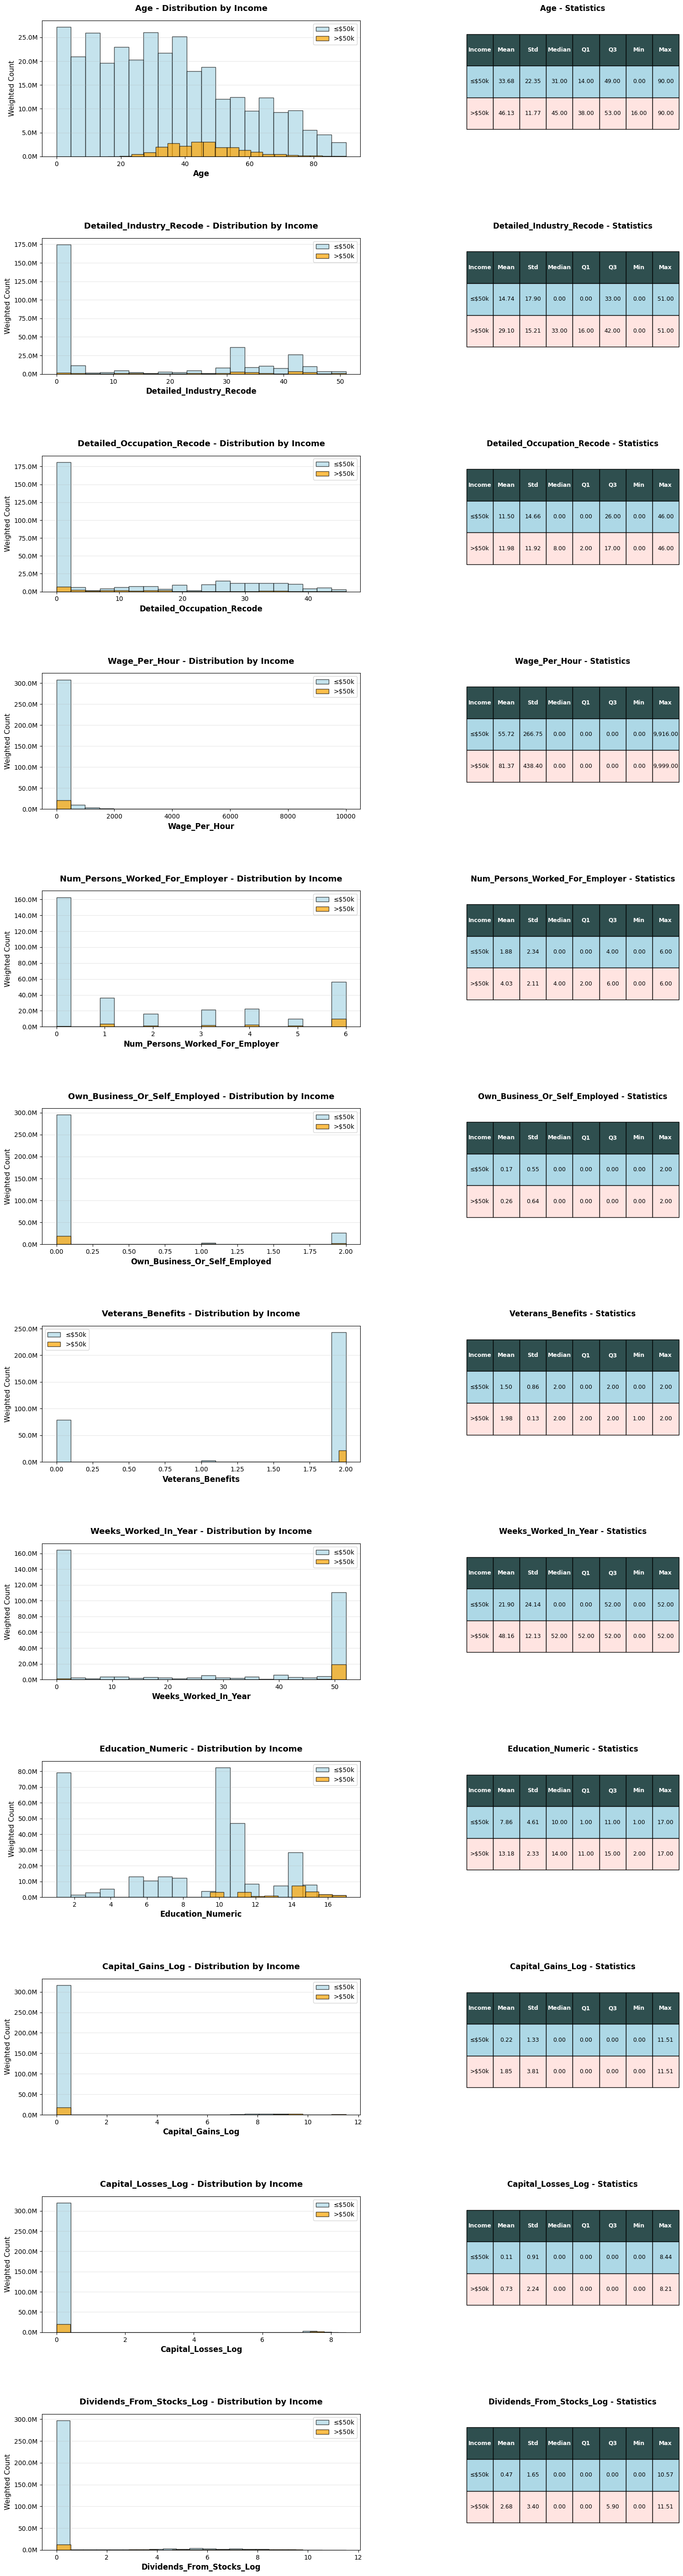

In [8]:
num_cont = len(continuous)
if num_cont > 0:
    fig = plt.figure(figsize=(18, 6 * num_cont))
    gs = GridSpec(num_cont, 2, figure=fig, width_ratios=[3, 2], hspace=0.6, wspace=0.4)

    avg_rate = np.average(df[target], weights=df[weight_col]) * 100

    for i, col in enumerate(continuous):
        display_name = col.title()

        ax1 = fig.add_subplot(gs[i, 0])
        low_income_data = df[df[target] == 0][col]
        low_income_weights = df[df[target] == 0][weight_col]
        high_income_data = df[df[target] == 1][col]
        high_income_weights = df[df[target] == 1][weight_col]
        num_bins = 20
        ax1.hist(
            low_income_data,
            bins=num_bins,
            weights=low_income_weights,
            alpha=0.7,
            label="≤$50k",
            color="lightblue",
            edgecolor="black",
        )
        ax1.hist(
            high_income_data,
            bins=num_bins,
            weights=high_income_weights,
            alpha=0.7,
            label=">$50k",
            color="orange",
            edgecolor="black",
        )

        ax1.set_xlabel(display_name, fontsize=12, fontweight="bold")
        ax1.set_ylabel("Weighted Count", fontsize=11)
        ax1.set_title(
            f"{display_name} - Distribution by Income",
            fontsize=13,
            fontweight="bold",
            pad=15,
        )
        ax1.legend(loc="best", fontsize=10)
        ax1.grid(axis="y", alpha=0.3)

        max_y = max(ax1.get_ylim()[1], 1)
        if max_y >= 1e9:
            ax1.yaxis.set_major_formatter(
                plt.FuncFormatter(lambda x, p: f"{x / 1e9:.1f}B")
            )
        elif max_y >= 1e6:
            ax1.yaxis.set_major_formatter(
                plt.FuncFormatter(lambda x, p: f"{x / 1e6:.1f}M")
            )

        ax2 = fig.add_subplot(gs[i, 1])
        ax2.axis("off")

        summary_stats = []
        for income_val, income_label in [(0, "≤$50k"), (1, ">$50k")]:
            subset = df[target] == income_val
            vals = df[subset][col]
            wts = df[subset][weight_col]

            avg = np.average(vals, weights=wts)
            med = np.median(vals)
            std = np.sqrt(np.average((vals - avg) ** 2, weights=wts))
            q1 = np.percentile(vals, 25)
            q3 = np.percentile(vals, 75)

            summary_stats.append(
                {
                    "Income": income_label,
                    "Mean": f"{avg:,.2f}",
                    "Std": f"{std:,.2f}",
                    "Median": f"{med:,.2f}",
                    "Q1": f"{q1:,.2f}",
                    "Q3": f"{q3:,.2f}",
                    "Min": f"{vals.min():,.2f}",
                    "Max": f"{vals.max():,.2f}",
                }
            )

        stats_table = pd.DataFrame(summary_stats)
        tbl = ax2.table(
            cellText=stats_table.values,
            colLabels=stats_table.columns,
            cellLoc="center",
            loc="center",
            bbox=[0, 0.2, 1, 0.7],
        )

        tbl.auto_set_font_size(False)
        tbl.set_fontsize(9)
        tbl.scale(1, 2)

        for j in range(len(stats_table.columns)):
            cell = tbl[(0, j)]
            cell.set_facecolor("darkslategray")
            cell.set_text_props(weight="bold", color="white")

        for j in range(len(summary_stats)):
            for k in range(len(stats_table.columns)):
                cell = tbl[(j + 1, k)]
                cell.set_facecolor("lightblue" if j == 0 else "mistyrose")

        ax2.set_title(
            f"{display_name} - Statistics", fontsize=12, fontweight="bold", pad=15
        )

    plt.tight_layout(pad=2.0)
    plt.savefig(
        "../artifacts/model_plots/analysis_continous_features.pdf",
        dpi=300,
        bbox_inches="tight",
    )
    plt.show()